In [ ]:
import time
import numpy as np
import time
from tensorflow._api.v2.compat.v1 import ConfigProto
from tensorflow._api.v2.compat.v1 import InteractiveSession
from tensorflow import keras
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import classification_report

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
        self.total_wall_time = time.time()
        self.total_cpu_time = time.process_time()
        
    def on_train_end(self, logs={}):
        self.total_wall_time = time.time() - self.total_wall_time
        self.total_cpu_time = time.process_time() - self.total_cpu_time
        
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_walltime_start = time.time()
        self.epoch_cputime_start = time.process_time()

    def on_epoch_end(self, batch, logs={}):
        self.epoch_walltime_end = time.time() - self.epoch_walltime_start
        self.epoch_cputime_end = time.process_time() - self.epoch_cputime_start
        #self.times.append(_val_wall_time)
        print(" - CPU time: {:.2f} seconds, Wall time: {:.2f} seconds".format(self.epoch_cputime_end ,self.epoch_walltime_end))

In [ ]:

def Normal(X_train, X_test):
    mean = np.mean(X_train, axis=(0, 1, 2, 3))
    # Return the standard variable
    std = np.std(X_train, axis=(0, 1, 2, 3))

    # plus 0.000000000001 to avoid Integer
    X_train = (X_train - mean) / (std + 0.000000000001)
    X_test = (X_test - mean) / (std + 0.000000000001)

    return X_train, X_test


def LoadData():
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)

    (X_train, X_test) = Normal(X_train, X_test)

    #test_labels = tf.constant(Y_test)
    #train_labels = tf.constant(Y_train)

    classes = 10

    Y_train = to_categorical(Y_train, classes)
    Y_test = to_categorical(Y_test, classes)

    X_valid, X_train_new, Y_valid, Y_train_new = X_train[:5000], X_train[5000:], Y_train[:5000], Y_train[5000:]

    return X_train_new, X_valid, X_test, Y_train_new, Y_valid, Y_test


# Define Conv, Bn and Relu Layer
class ConvBNRelu(tf.keras.Model):
    def __init__(self, filters, kernel_size=3, strides=1, padding='SAME', weight_decay=0.0005, rate=0.4, drop=True):
        super(ConvBNRelu, self).__init__()

        self.drop = drop
        self.conv = keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding,
                                        kernel_regularizer=tf.keras.regularizers.l2(weight_decay))
        self.batchnorm = tf.keras.layers.BatchNormalization()
        self.dropOut = keras.layers.Dropout(rate=rate)

    def call(self, inputs):
        layer = self.conv(inputs)
        layer = tf.nn.relu(layer)
        layer = self.batchnorm(layer)

        if (self.drop):
            layer = self.dropOut(layer)

        return layer


# Create the Model
class CNNModel(tf.keras.Model):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = ConvBNRelu(filters=32, kernel_size=[3, 3], rate=0.3, drop=False)
        self.conv2 = ConvBNRelu(filters=32, kernel_size=[3, 3], drop=False)
        self.maxPooling1 = keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.conv3 = ConvBNRelu(filters=64, kernel_size=[3, 3])
        self.maxPooling2 = keras.layers.MaxPooling2D(pool_size=(2, 2))

        self.flat = keras.layers.Flatten()
        self.dropOut = keras.layers.Dropout(rate=0.5)

        self.dense1 = keras.layers.Dense(units=512, activation='relu',
                                         kernel_regularizer=tf.keras.regularizers.l2(0.0005))

        self.batchnorm = tf.keras.layers.BatchNormalization()

        self.dense2 = keras.layers.Dense(units=10)

        self.softmax = keras.layers.Activation('softmax')

    def call(self, inputs):
        model = self.conv1(inputs)
        model = self.conv2(model)
        model = self.maxPooling1(model)
        model = self.conv3(model)
        model = self.maxPooling2(model)

        model = self.flat(model)
        #model = self.dropOut(model)

        model = self.dense1(model)
        model = self.batchnorm(model)
        model = self.dropOut(model)
        model = self.dense2(model)
        model = self.softmax(model)

        return model


# Create the Model
class CNNModel(tf.keras.Model):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = ConvBNRelu(filters=32, kernel_size=[3, 3], rate=0.3, drop=False)
        self.conv2 = ConvBNRelu(filters=32, kernel_size=[3, 3], drop=False)
        self.maxPooling1 = keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.conv3 = ConvBNRelu(filters=64, kernel_size=[3, 3])
        self.maxPooling2 = keras.layers.MaxPooling2D(pool_size=(2, 2))

        self.flat = keras.layers.Flatten()
        self.dropOut = keras.layers.Dropout(rate=0.5)

        self.dense1 = keras.layers.Dense(units=512, activation='relu',
                                         kernel_regularizer=tf.keras.regularizers.l2(0.0005))

        self.batchnorm = tf.keras.layers.BatchNormalization()

        self.dense2 = keras.layers.Dense(units=10)

        self.softmax = keras.layers.Activation('softmax')

    def call(self, inputs):
        model = self.conv1(inputs)
        model = self.conv2(model)
        model = self.maxPooling1(model)
        model = self.conv3(model)
        model = self.maxPooling2(model)

        model = self.flat(model)
        #model = self.dropOut(model)

        model = self.dense1(model)
        model = self.batchnorm(model)
        model = self.dropOut(model)
        model = self.dense2(model)
        model = self.softmax(model)

        return model


if __name__ == '__main__':
    print('tf.__version__:', tf.__version__)
    print('keras.__version__:', keras.__version__)

    training_epochs = 450
    batch_size = 128
    learning_rate = 0.1
    momentum = 0.9
    lr_decay = 1e-6
    lr_drop = 20

    tf.random.set_seed(777)
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


    def lr_scheduler(epoch):
        return learning_rate * (0.5 ** (epoch // lr_drop))


    reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

    X_train_new, X_valid, X_test, Y_train_new, Y_valid, Y_test = LoadData()

    # Data Augment
    datagen = ImageDataGenerator(featurewise_center=False,samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False,rotation_range=15,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,vertical_flip=False)

    print(datagen)
    datagen.fit(X_train_new)

    model = CNNModel()


    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=learning_rate,
        decay_steps=10000,
        decay_rate=0.96)
    optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

    #optimizer = keras.optimizers.SGD(learning_rate=learning_rate, decay=1e-6, momentum=momentum, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    #The real-time test test is only for the convenience of observation, so it does not affect the training process.
    # validation_data=(X_test, Y_test)

    t1 = time.time()
    t1_cpu = time.process_time()
    time_callback = TimeHistory()
    history = model.fit(datagen.flow(X_train_new, Y_train_new, batch_size=batch_size), epochs=training_epochs, verbose=2,callbacks=[reduce_lr, time_callback], steps_per_epoch=X_train_new.shape[0] // batch_size, validation_data=(X_valid, Y_valid))
    t2 = time.time()
    t2_cpu = time.process_time()
    CNNfit = float(t2 - t1)
    CNNfit_cpu = float(t2_cpu - t1_cpu)
    print("Wall Time taken: {} seconds".format(CNNfit))
    print("CPU Time taken: {} seconds".format(CNNfit_cpu))

tf.__version__: 2.12.0
keras.__version__: 2.12.0
Epoch 1/450
 - CPU time: 32.53 seconds, Wall time: 27.22 seconds
351/351 - 27s - loss: 2.3211 - accuracy: 0.3922 - val_loss: 2.0167 - val_accuracy: 0.4596 - lr: 0.0999 - 27s/epoch - 78ms/step
Epoch 2/450
 - CPU time: 31.14 seconds, Wall time: 26.63 seconds
351/351 - 27s - loss: 1.8807 - accuracy: 0.5034 - val_loss: 1.8828 - val_accuracy: 0.5492 - lr: 0.0997 - 27s/epoch - 76ms/step
Epoch 3/450
 - CPU time: 30.51 seconds, Wall time: 25.43 seconds
351/351 - 25s - loss: 1.7233 - accuracy: 0.5561 - val_loss: 1.9914 - val_accuracy: 0.5764 - lr: 0.0996 - 25s/epoch - 72ms/step
Epoch 4/450
 - CPU time: 30.72 seconds, Wall time: 25.53 seconds
351/351 - 26s - loss: 1.6103 - accuracy: 0.5886 - val_loss: 2.0520 - val_accuracy: 0.5718 - lr: 0.0994 - 26s/epoch - 73ms/step
Epoch 5/450
 - CPU time: 31.33 seconds, Wall time: 26.75 seconds
351/351 - 27s - loss: 1.5281 - accuracy: 0.6144 - val_loss: 1.6019 - val_accuracy: 0.6334 - lr: 0.0993 - 27s/epoch - 7

Using matplotlib backend: <object object at 0x7f54740b0c10>
Populating the interactive namespace from numpy and matplotlib


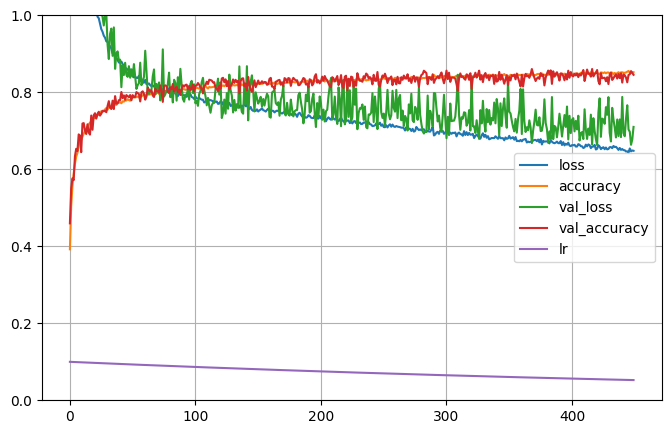

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab
%matplotlib inline
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:

def tf_recall_score(y_true, y_pred):
    """
    micro: f1 score accross the classes, as 1
    macro: mean of f1 scores per class
    weighted: weighted average of f1 scores per class,
            weighted from the support of each class

    Args:
        y_true (Tensor): labels, with shape (batch, num_classes)
        y_pred (Tensor): model's predictions, same shape as y_true

    Returns:
        tuple(Tensor): (micro, macro, weighted)
                    tuple of the computed f1 scores
    """

    recalls = [0, 0, 0]

    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(y_pred, tf.float64)

    for i, axis in enumerate([None, 0]):
        TP = tf.math.count_nonzero(y_pred * y_true, axis=axis, dtype=tf.float32)
        FP = tf.math.count_nonzero(y_pred * (y_true - 1), axis=axis, dtype=tf.float32)
        FN = tf.math.count_nonzero((y_pred - 1) * y_true, axis=axis, dtype=tf.float32)

        #precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        recall = tf.cast(recall, tf.float64)
        #f1 = 2 * precision * recall / (precision + recall)

        recalls[i] = tf.reduce_mean(recall)

    weights = tf.reduce_sum(y_true, axis=0)
    weights /= tf.reduce_sum(weights)
    weights = tf.cast(weights, tf.float64)

    recalls[2] = tf.reduce_sum(recall * weights)

    micro, macro, weighted = recalls
    return micro, macro, weighted

def tf_precision_score(y_true, y_pred):
    precisions = [0, 0, 0]

    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(y_pred, tf.float64)

    for i, axis in enumerate([None, 0]):
        TP = tf.math.count_nonzero(y_pred * y_true, axis=axis, dtype=tf.float32)
        FP = tf.math.count_nonzero(y_pred * (y_true - 1), axis=axis, dtype=tf.float32)
        FN = tf.math.count_nonzero((y_pred - 1) * y_true, axis=axis, dtype=tf.float32)

        precision = TP / (TP + FP)
        precision = tf.cast(precision, tf.float64)

        precisions[i] = tf.reduce_mean(precision)

    weights = tf.reduce_sum(y_true, axis=0)
    weights /= tf.reduce_sum(weights)
    weights = tf.cast(weights, tf.float64)

    precisions[2] = tf.reduce_sum(precision * weights)

    micro, macro, weighted = precisions
    return micro, macro, weighted

In [ ]:
Y_proba = model.predict(X_test)
Y_pred = np.argmax(Y_proba, axis = 1)

classes = 10
labels = tf.cast(tf.constant(Y_test), dtype=tf.int32)

#Y_test_label = tf.one_hot(labels,classes)
print(labels) 

labels_ = tf.constant(Y_pred) 
Y_pred_label = tf.cast(tf.one_hot(labels_,classes), dtype=tf.int32)
print(Y_pred_label)

313/313 [==============================] - 1s 2ms/step
tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]], shape=(10000, 10), dtype=int32)
tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]], shape=(10000, 10), dtype=int32)


In [ ]:
micro_recall, macro_recall, weighted_recall = tf_recall_score(labels, Y_pred_label)
#micro_recall, macro_recall, weighted_recall

micro_precision, macro_precision, weighted_precision = tf_precision_score(labels, Y_pred_label)
#micro_precision, macro_precision, weighted_precision
Y_test_notonehot = np.argmax(Y_test, axis=1)
print(Y_test, Y_pred)
metric = model.evaluate(X_test, Y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]] [3 8 8 ... 5 1 7]
313/313 [==============================] - 1s 4ms/step - loss: 0.7482 - accuracy: 0.8301


In [ ]:
#DatFrame for accuracy, precision and recall on the test set
total_df = pd.DataFrame({
    'micro_precision': [micro_precision.numpy()],
    'macro_precision': [macro_precision.numpy()],
    'weighted_precision': [weighted_precision.numpy()],
    'micro_recall': [micro_recall.numpy()],
    'macro_recall': [macro_recall.numpy()],
    'weighted_recall': [weighted_recall.numpy()],
    'accuracy':[metric[1]]
})
total_df = total_df.style.set_caption('Test Set')

In [ ]:
total_df

,micro_precision,macro_precision,weighted_precision,micro_recall,macro_recall,weighted_recall,accuracy
0,0.830100,0.834701,0.834701,0.830100,0.830100,0.830100,0.830100


In [ ]:

print(classification_report(Y_test_notonehot, Y_pred, target_names=class_names))

,precision,recall
0,0.782230,0.898
1,0.927254,0.905
2,0.822633,0.756
3,0.747585,0.619
4,0.776243,0.843
5,0.886640,0.657
6,0.736967,0.933
7,0.928183,0.853
8,0.835273,0.933
9,0.904000,0.904
